In [5]:
include("TypeRDS.jl")
include("Test.jl")

sampling

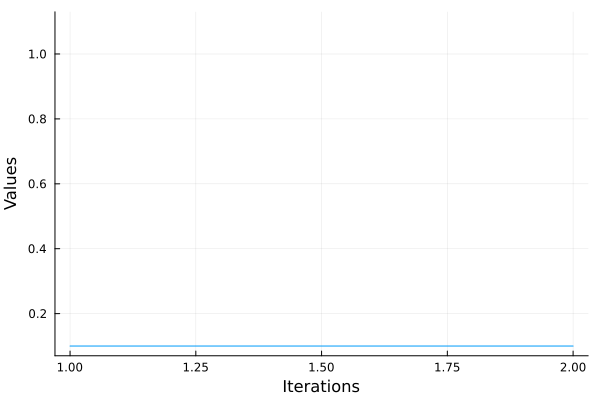

┌ Info: Saved animation to C:\Users\littl\AppData\Local\Temp\jl_l0zmTklkV2.gif
└ @ Plots C:\Users\littl\.julia\packages\Plots\tDI0A\src\animation.jl:156


Float64[]

In [6]:
f(ω, x) = x
p(x) = x
rds = RDS(Interval{Closed, Closed}(0,1), 1 , Normal())
function run()
    fω(.3, [1], f)
    x=sampleTraj(rds, 1, [.1], f)
    timeseries(x, p)
    empiricalAverage(x)
    testing(x)
    tracking(x)
    sampling(1, Normal())
end
run()

The main goal is to build a Julia package that is capable of running simulations, or smaples, of random dynamical systems. The core of our package is our `Type RDS`, which will contain all  necessary information related to our random dynamical system. Below is how one instantiates a `Type RDS`.

In [8]:
struct RDS
    M::Interval                 # Phase Space M.
    SampleSpaceDimension::Int   # Dimesnion of Ω₀    
    LawOfSamples::Distribution  # Distribution of Ω₀
end

rds = RDS(Interval{Closed, Closed}(0,1), 1, Normal())

RDS(Interval{Int64, Closed, Closed}(0, 1), 1, Normal{Float64}(μ=0.0, σ=1.0))

When evaluating our random dynamical system over time, it is common for our initial data vector, $X_0$, to be sampled from a distribution. Below shows initial data vectors sampled from different distributions. We are doing this using method `sampling(n, dist)`, which takes `n` samples from distribution `dist` over the interval $[0,1]$. 

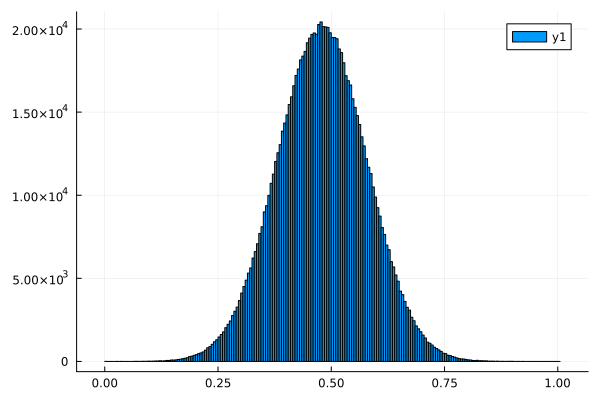

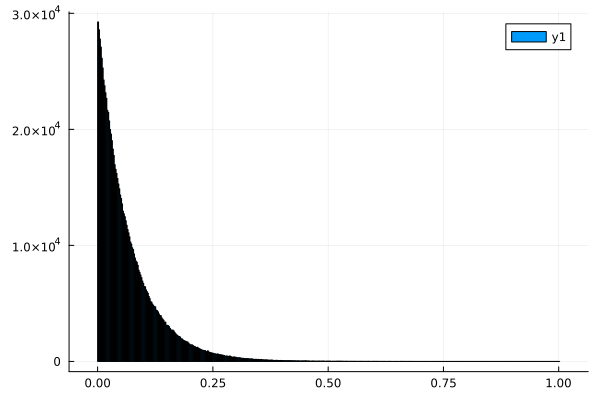

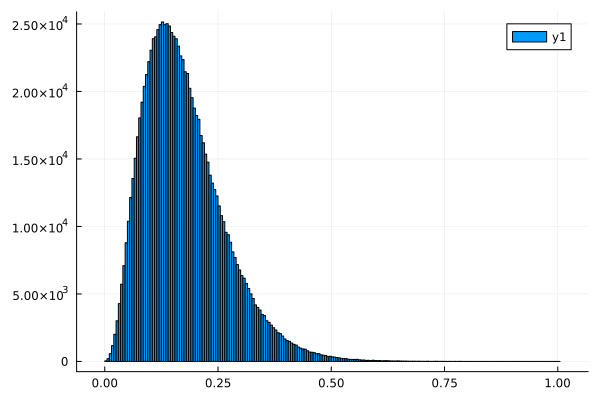

In [9]:
distributions = [Normal(), Exponential(), Chisq(8)]
for dist in distributions
    display(histogram(sampling(1000000, dist)))
end

As far as evolving our initial data overtime, we will be interested in the following composition:
$$f^n = f_{\omega_n} \circ \cdots \circ f_{\omega_1}: M \to M$$
where $f: \Omega_0 \times M \to M, (\omega, x) \mapsto f_\omega(x)$. If the $\omega_i$ are IID, then the sequence of R.V.
$$X_n = f_{\omega_n}(X_{n-1})$$
forms a Markov chain on M. $f_{\omega_i}$ is what is moving our random dynamical system forward.

It would be helpful to have a method that samples a trajectory of a RDS through n iterations. That is what `sampleTraj` is used for. It takes in four parameters:
- `System:RDS`: Our random dynamical system.
- `n::Int64`: Length of wanted trajectory.
- `x0`: Initial data vector.
- `func::Function`: $f_\omega$

┌ Info: Saved animation to C:\Users\littl\AppData\Local\Temp\jl_9yVCrsXC90.gif
└ @ Plots C:\Users\littl\.julia\packages\Plots\tDI0A\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\littl\\AppData\\Local\\Temp\\jl_9yVCrsXC90.gif")
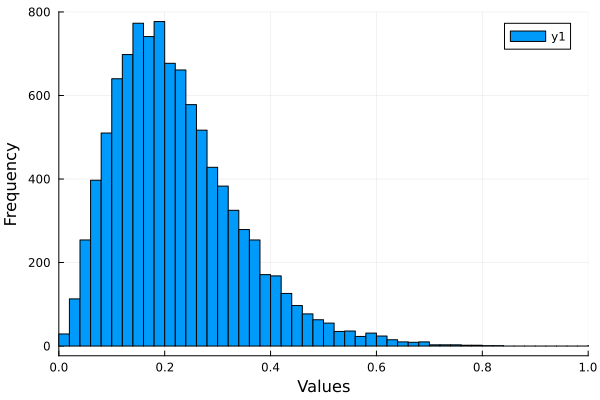

In [36]:
x0 = sampling(10000, Chisq(8))
function f(ω::Float64, x::Float64)
    return mod(ω, 1) * x
end

traj = sampleTraj(rds, 10, x0, f)
tracking(traj)